In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import GPT2Tokenizer, GPT2Model, GPT2LMHeadModel

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2Model.from_pretrained("gpt2", output_hidden_states=True, output_attentions=True)
model.eval()

print("Model name:", model.config.name_or_path)
print("Tokenizer:", tokenizer.name_or_path)
print("Vocabulary size:", tokenizer.vocab_size)
print("Embedding dimensions:", model.config.hidden_size)
print("Number of attention layers:", model.config.num_hidden_layers)

Model name: gpt2
Tokenizer: gpt2
Vocabulary size: 50257
Embedding dimensions: 768
Number of attention layers: 12


In [18]:
test = ["The american flag is red, white, and blue.",
        "Alice picked up the book that Bob had placed on the table near the window.",
        "Although the room was dimly lit, she could still make out the handwritten notes in the margins.",
        "Bob, unaware that Alice had found the book, continued searching the kitchen.",
        "The book, an old journal bound in cracked leather, held secrets neither of them expected.",
        "As she flipped through the pages, Alice paused on one entry dated July 18th, 1972.",
        "The entry described a hidden compartment beneath the floorboards of the very room they stood in.",
        "Meanwhile, Bob shouted from the hallway that he had found a strange key inside a broken vase.",
        "When Alice called him over, she showed him the passage and pointed to a faint X marked on the floor.",
        "Together, they moved the rug and pried open the floorboards, revealing a small wooden box with a brass lock.",
        "Bob handed her the key, and with a deep breath, Alice turned it slowly until the lock clicked open.",
        "Dr. Eliza Hammond had always been fascinated by marine bioluminescence.",
        "In 2009, she began a long-term study of Pyrosoma atlanticum, a pelagic tunicate known for its glowing colonies."
        "Her initial research involved deep-sea dives off the coast of Madagascar, where she recorded light pulses during mating rituals. By 2012, her team had compiled over 500 hours of footage and thousands of samples. Unexpectedly, a rare mutation in one specimen altered its light-emitting pattern significantly. At first, Eliza dismissed it as an anomaly caused by stress or pollution. However, repeated occurrences across unrelated colonies made her reconsider. She hypothesized that these patterns were a form of complex communication, possibly even a warning system. After months of modeling, her team decoded a repeating sequence resembling binary code. It wasn until 2016 that the data showed statistically significant behavioral changes in response to these sequences. When she published her findings, the scientific community was skeptical. But a 2020 follow-up study from Japan confirmed her theory, cementing her place in marine biology history.",
        "The astronaut carefully sealed the hatch behind her before activating the oxygen flow. "
        "Her partner, still inside the main module, monitored her vitals on a flickering screen. "
        "Years of training had prepared her for this spacewalk, but the silence still unnerved her. "
        "As she floated toward the detached satellite, she recalled the simulations from Earth. "
        "They had practiced this exact maneuver dozens of times, each with slightly different variables. "
        "The satellite, tumbling slowly, was barely visible against the black backdrop of space. "
        "She reached out with a gloved hand and grabbed the tether connecting it to the station. "
        "Back inside, her partner counted down the minutes until they lost sunlight. "
        "If she couldn't finish the repair in time, they’d have to abort the mission. "
        "With one final adjustment, she locked the panel in place just as the shadow enveloped her.",
        "Marcus loved walking through the forest trail behind his childhood home. "
        "The old path had changed little over the years, though some of the trees had grown massive. "
        "One tree in particular held his interest—a tall oak with initials carved deep into its bark. "
        "He had made that mark the day before his family moved away. "
        "Now, years later, the letters were still visible, though weather-worn and faded. "
        "As he traced the carving with his finger, a squirrel darted across his foot, startling him. "
        "He laughed, remembering how he and his sister used to chase them with sticks and wild energy. "
        "Somewhere in the distance, he heard a familiar whistle—a tune only she used to hum. "
        "Turning quickly, he scanned the trees, heart racing at the impossibility. "
        "But the trail remained silent, as if it held the memory just long enough to let it go again.",
        "The engineer laid out the blueprints, careful not to let the corners curl under the breeze. "
        "A half-empty coffee mug rested beside his elbow, long forgotten and cold. "
        "He reviewed the structural supports, double-checking the dimensions for the west wing. "
        "It had taken weeks to calculate the load-bearing thresholds for the upper floors. "
        "Any mistake here could cause the entire tower to collapse during construction. "
        "As he adjusted a measurement, the pencil lead snapped in his hand. "
        "He reached for another but paused, noticing a faint smudge along the paper’s edge. "
        "The smudge formed a perfect arc—one that shouldn’t be part of the design. "
        "Frowning, he traced it back through the other pages, realizing the error had originated in the first draft. "
        "He stood abruptly, knocking over the mug, and ran to alert the team before it was too late.",
        "Jenna slammed the book shut and glared across the table. "
        "'You knew about this the whole time, didn’t you?' she said. "
        "Carlos avoided her gaze, his fingers drumming a guilty rhythm on the tabletop. "
        "In the corner, Mira watched them silently, unsure whether to intervene. "
        "'I only found out yesterday,' Carlos muttered, 'and I didn’t know how to tell you.' "
        "Jenna stood up, knocking her chair back. "
        "'You had every opportunity!' she shouted. "
        "Mira finally stepped forward, placing a hand on Jenna’s arm. "
        "'He was trying to protect you,' she said, her voice calm but firm. "
        "For a moment, no one spoke, the tension hanging like static in the room.",
        "The lighthouse had stood for nearly two hundred years, its bricks weathered by wind and salt. "
        "Generations of keepers had come and gone, each leaving behind their own small mark. "
        "Inside, the stairs spiraled tightly, creaking with each step as Daniel ascended. "
        "He carried a small lantern, though daylight still seeped through the cracks in the walls. "
        "At the top, he found the logbook—open to a page that hadn’t been written in for decades. "
        "The handwriting was elegant and firm, dated the week his great-grandfather vanished at sea. "
        "He ran his fingers over the ink, imagining the storm that had taken him. "
        "Outside, waves crashed violently against the rocks, as if echoing that long-ago tempest. "
        "Daniel closed the book and set the lantern down beside it. "
        "This time, he knew he wouldn't leave without understanding what really happened."
]

tot_tokens = 0
diff = np.zeros(12, dtype=object)
for input_text in test:
    inputs = tokenizer(input_text, return_tensors="pt")
    tot_tokens += inputs.input_ids.shape[1]

    with torch.no_grad():
        outputs = model(**inputs)
        hidden_states = outputs.hidden_states

    layers = hidden_states[1:]
    attentions = outputs.attentions

    for layer in range(12):
        lay = np.zeros((12, 12))
        for i in range(12):
            for j in range(12):
                if i > j:
                    att_i = attentions[layer][0, i]
                    att_j = attentions[layer][0, j]
                    lay[i, j] = torch.norm((att_i - att_j))
                    lay[j, i] = lay[i, j]
        diff[layer] += lay

diff = diff / len(test)
print("Total tokens processed:", tot_tokens)

Total tokens processed: 1278


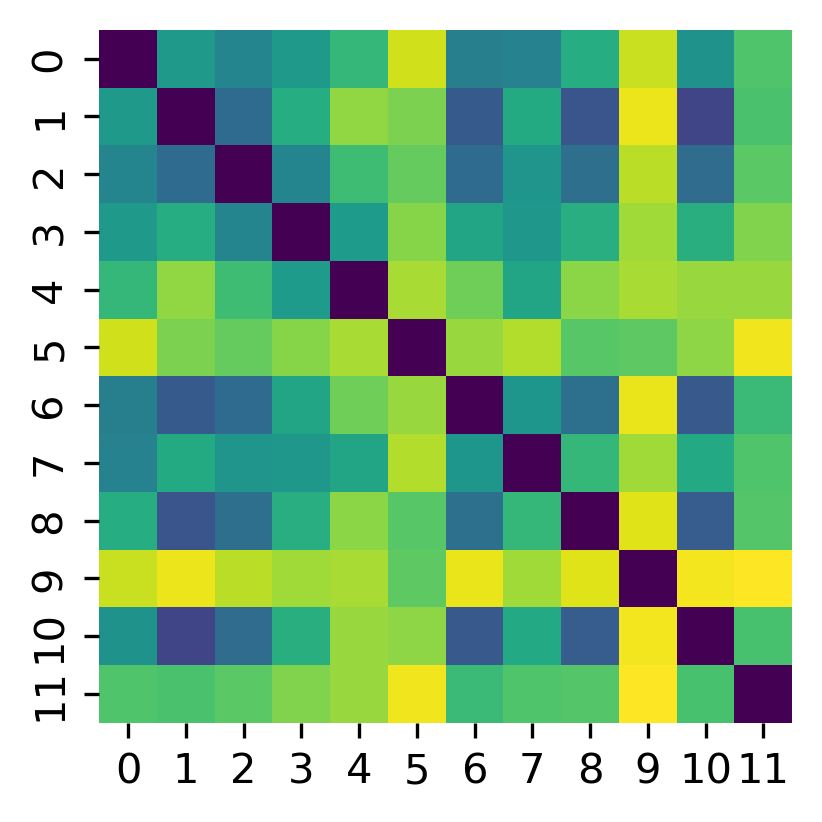

In [24]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=300)
sns.heatmap(diff[10], cmap="viridis", cbar=False, square=True,
            xticklabels=[f"{i}" for i in range(12)],
            yticklabels=[f"{i}" for i in range(12)])
plt.savefig("../fig/difference_layer_10.svg", bbox_inches='tight', dpi=300)
#plt.close()
plt.show()

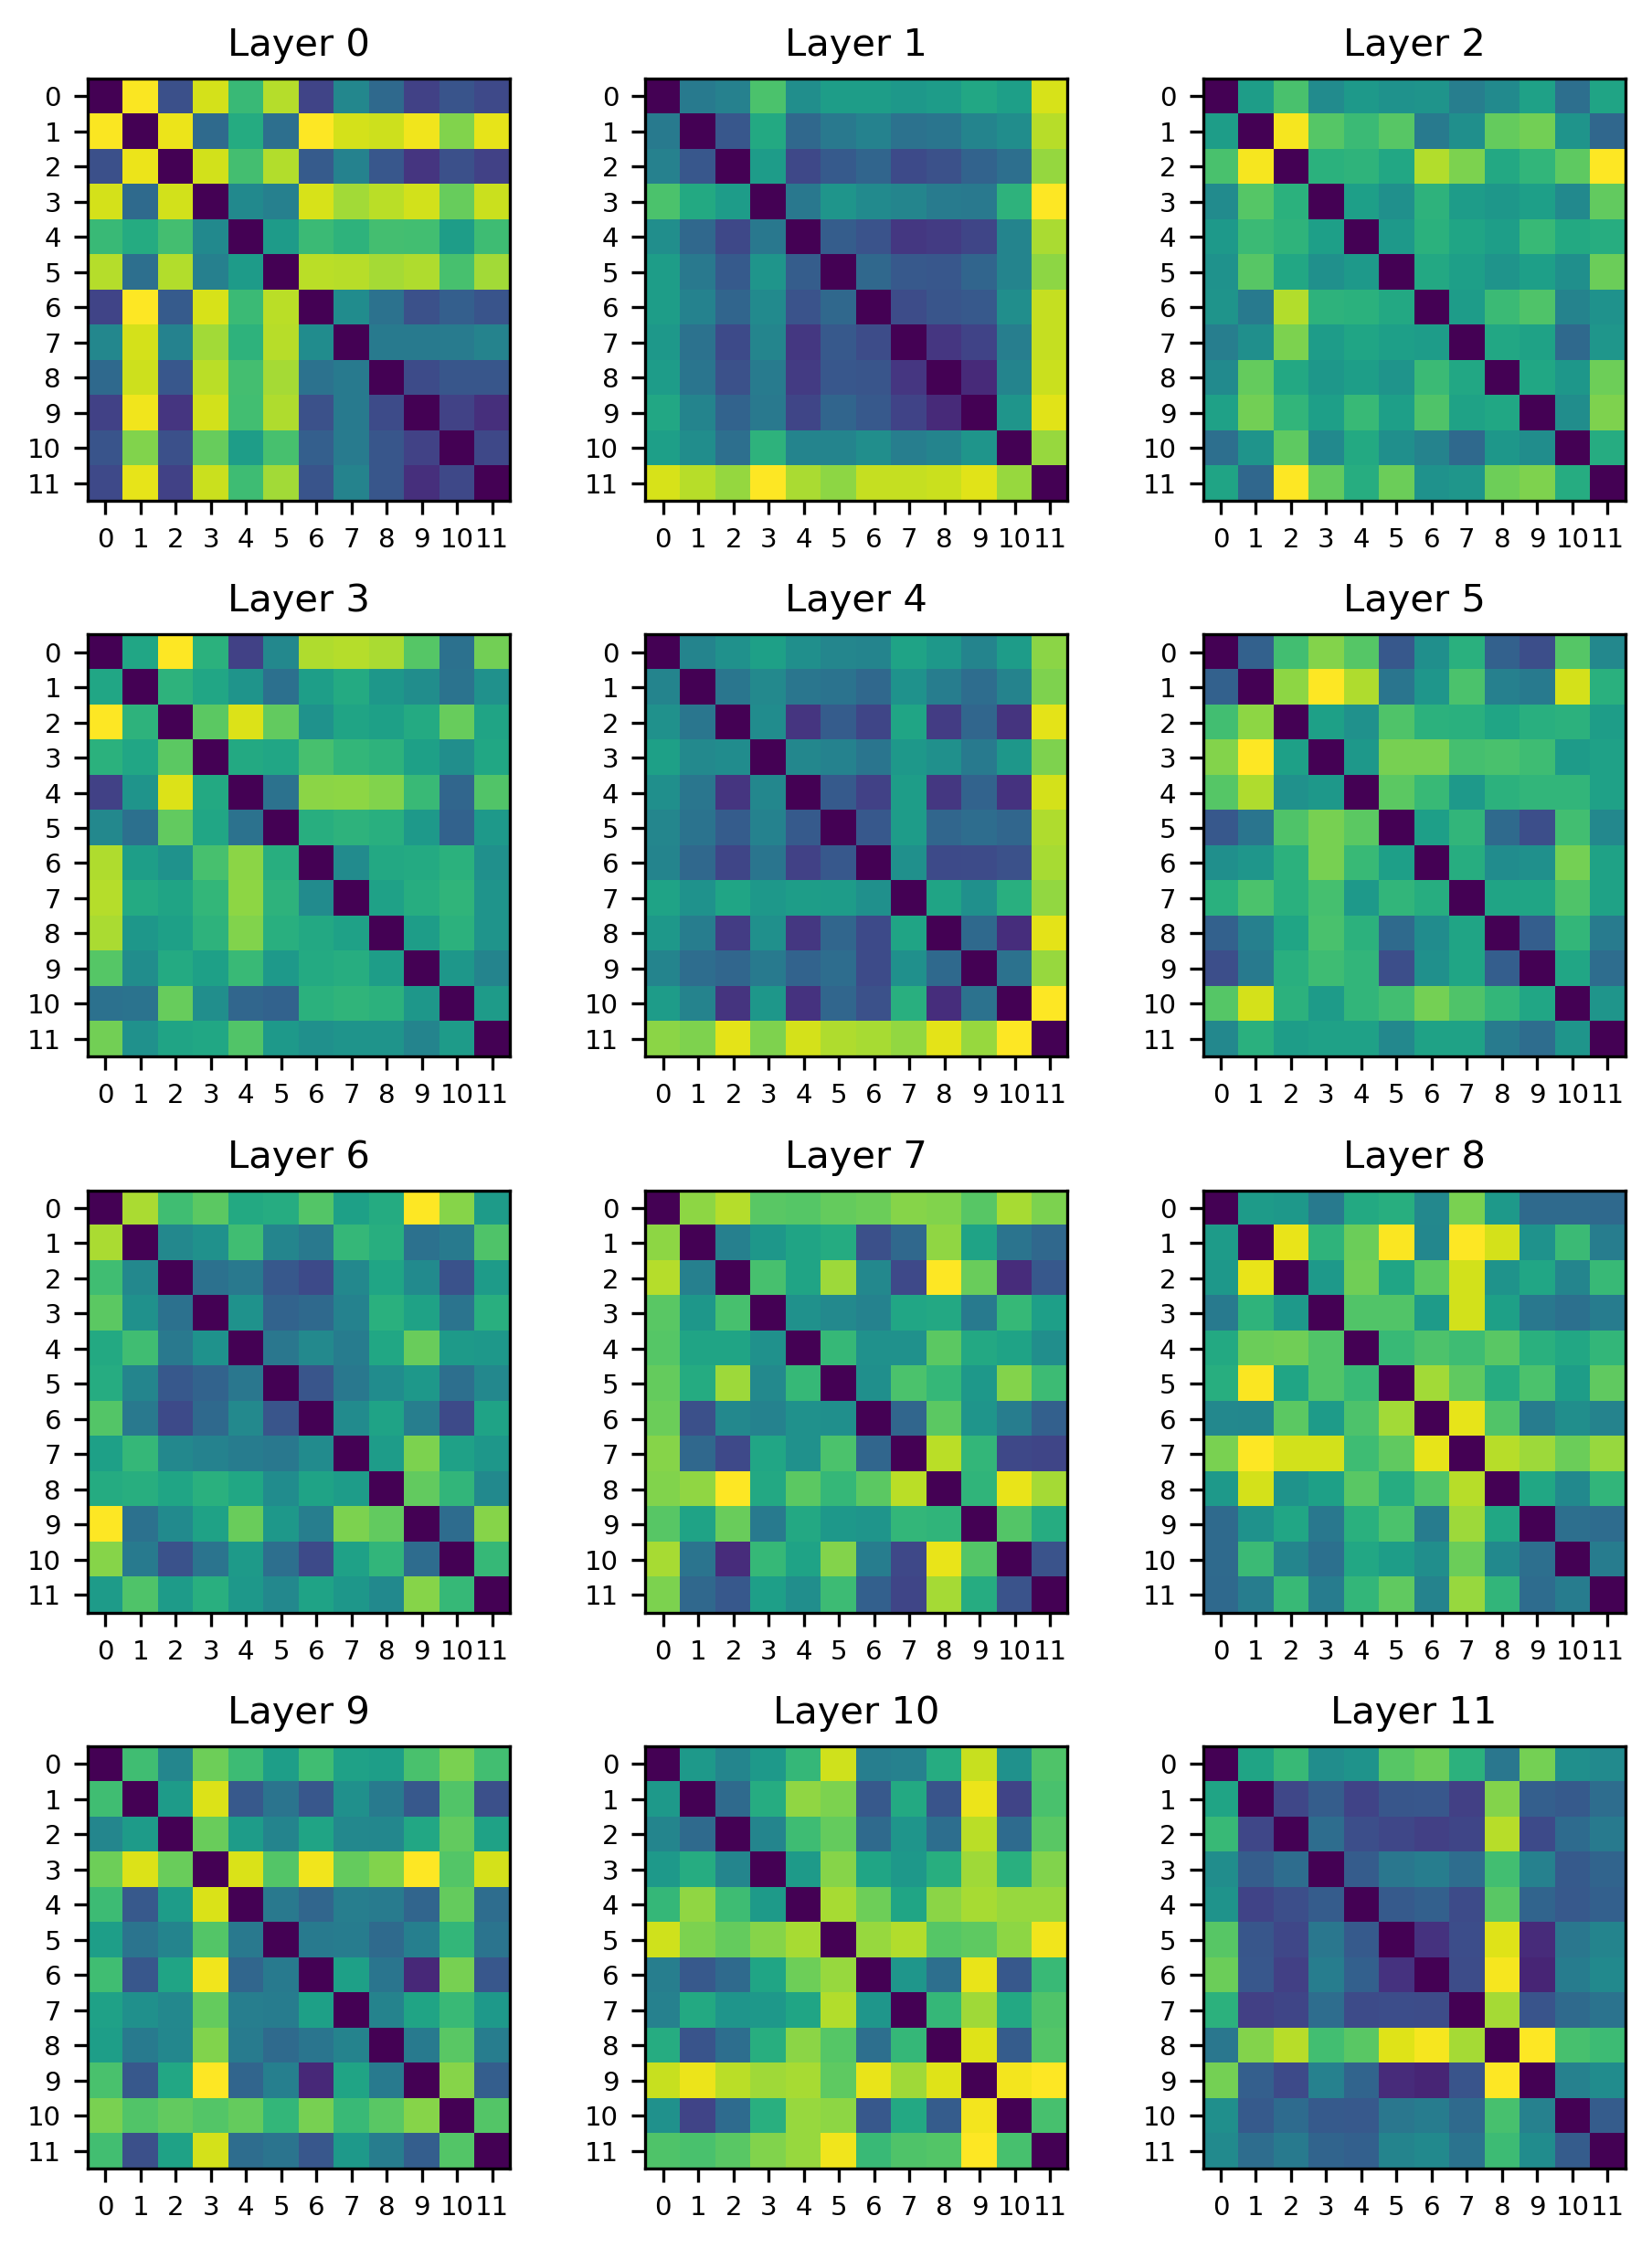

In [16]:
fig, axes = plt.subplots(4, 3, figsize=(6, 8), dpi=300)
for i, ax in enumerate(axes.flat):
    im = ax.imshow(diff[i], cmap='viridis', interpolation='nearest')
    ax.set_title(f"Layer {i}", fontsize=10)
    #ax.set_xlabel("Head", fontsize=8)
    #ax.set_ylabel("Head", fontsize=8)
    ax.set_xticks(np.arange(12))
    ax.set_yticks(np.arange(12))
    ax.tick_params(axis='both', which='major', labelsize=7)

plt.tight_layout(pad=0, w_pad=0.8, h_pad=0.8)
#cbar_ax = fig.add_axes([0.2, -0.08, 0.6, 0.03])
#fig.colorbar(im, cax=cbar_ax, orientation='horizontal', label='Normalized Grassmann distance', shrink=0.8)
#plt.subplots_adjust(bottom=0.01)
plt.savefig("../fig/gpt2_attention_diff.svg", bbox_inches='tight', dpi=300, transparent=True)
plt.show()